## Import Dependencies

In [1]:
import atoti
import pandas as pd

## Instantiate Atoti Server and UI

In [2]:
# Start an Atoti Server instance
session = atoti.Session(
    user_content_storage="./content",
    port=9092,
    java_options=["-Xms1G", "-Xmx10G"],
    # app_extensions=tt.ADVANCED_APP_EXTENSION,
)
session.link

http://localhost:9092

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.

## Inspect Data Quality Using Pandas

In [3]:
# Read CSV into Pandas DataFrame
pizza_sales_df = pd.read_csv("data/pizza_sales.csv")
pizza_sales_df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/15,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/15,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/15,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/15,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/15,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
pizza_sales_df.isnull().sum(axis=0)

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [5]:
pizza_sales_df.dtypes

order_details_id       int64
order_id               int64
pizza_id              object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [6]:
# Convert string to datetime and set day of the week (e.g. Monday=0, Sunday=6)
pizza_sales_df["order_date"] = pd.to_datetime(
    pizza_sales_df["order_date"], format="mixed"
)
pizza_sales_df["dayofweek"] = pizza_sales_df["order_date"].dt.dayofweek

# View modified DataFrame
pizza_sales_df["order_details_id"] = pizza_sales_df["order_details_id"].astype(str)
pizza_sales_df["order_id"] = pizza_sales_df["order_id"].astype(str)
pizza_sales_df["dayofweek"] = pizza_sales_df["dayofweek"].astype(str)
pizza_sales_df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,dayofweek
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,3
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,3
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,3
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,3
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,3


In [7]:
pizza_sales_df.dtypes

order_details_id             object
order_id                     object
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dayofweek                    object
dtype: object

## Load Pandas DataFrame Into Atoti Cube

In [8]:
# Load Pandas DataFrame as Atoti Table object
pizza_sales_table = session.read_pandas(
    pizza_sales_df, table_name="pizza_sales_table", keys=["order_details_id"]
)
pizza_sales_table.head()

,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,dayofweek
order_details_id,,,,,,,,,,,,
13,7,spinach_supr_s,1,2015-01-01,12:50:37,12.5,12.5,S,Supreme,"Spinach, Red Onions, Pepperoni, Tomatoes, Arti...",The Spinach Supreme Pizza,3
27,11,cali_ckn_l,1,2015-01-01,13:02:59,20.75,20.75,L,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza,3
41,16,napolitana_s,1,2015-01-01,13:34:07,12.0,12.0,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,3
55,19,sicilian_l,1,2015-01-01,13:59:09,20.25,20.25,L,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza,3
69,26,classic_dlx_s,1,2015-01-01,14:54:26,12.0,12.0,S,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,3


In [9]:
cube = session.create_cube(pizza_sales_table)

## Cube Data Model Analysis

/Users/aya/anaconda3/envs/atoti/lib/python3.10/site-packages/atoti/cube.py:127: FutureWarning: Accessing the database sub schema for a specific cube is deprecated. Use `Session.tables.schema` instead
  deprecated(


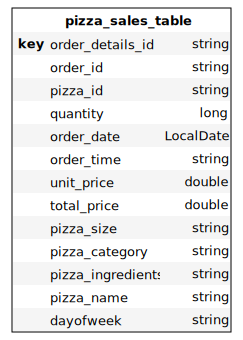

In [10]:
cube.schema

In [11]:
h, l, m = cube.hierarchies, cube.levels, cube.measures

In [12]:
# View hierarchies for the cube
cube.create_date_hierarchy("multi-level time", column=pizza_sales_table["order_date"])
h

{('pizza_sales_table', 'dayofweek'): <atoti.hierarchy.Hierarchy object at 0x12fd02230>, ('pizza_sales_table', 'pizza_id'): <atoti.hierarchy.Hierarchy object at 0x12fd02290>, ('pizza_sales_table', 'pizza_name'): <atoti.hierarchy.Hierarchy object at 0x12fd02380>, ('pizza_sales_table', 'pizza_ingredients'): <atoti.hierarchy.Hierarchy object at 0x12fd02470>, ('pizza_sales_table', 'order_id'): <atoti.hierarchy.Hierarchy object at 0x12fd02560>, ('pizza_sales_table', 'order_date'): <atoti.hierarchy.Hierarchy object at 0x12fd02650>, ('pizza_sales_table', 'multi-level time'): <atoti.hierarchy.Hierarchy object at 0x12fd02740>, ('pizza_sales_table', 'order_details_id'): <atoti.hierarchy.Hierarchy object at 0x12fd02830>, ('pizza_sales_table', 'pizza_category'): <atoti.hierarchy.Hierarchy object at 0x12fd02aa0>, ('pizza_sales_table', 'order_time'): <atoti.hierarchy.Hierarchy object at 0x12fd02b90>, ('pizza_sales_table', 'pizza_size'): <atoti.hierarchy.Hierarchy object at 0x12fd02c80>}

In [13]:
# View levels for the cube
l

In [14]:
# View measures for the cube
m

{'contributors.COUNT': <atoti.measure.Measure object at 0x10cb300d0>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x12fd2c670>, 'order_date_auto_y.MEAN': <atoti.measure.Measure object at 0x12fd2c5b0>, 'order_date_auto_y.SUM': <atoti.measure.Measure object at 0x12fd2c520>, 'unit_price.MEAN': <atoti.measure.Measure object at 0x12fd2c4f0>, 'unit_price.SUM': <atoti.measure.Measure object at 0x12ce82c80>, 'order_date_auto_M.MEAN': <atoti.measure.Measure object at 0x12ce80fd0>, 'order_date_auto_M.SUM': <atoti.measure.Measure object at 0x12ce810f0>, 'order_date_auto_d.MEAN': <atoti.measure.Measure object at 0x12ce832e0>, 'order_date_auto_d.SUM': <atoti.measure.Measure object at 0x12ce81cc0>, 'quantity.MEAN': <atoti.measure.Measure object at 0x12ce81870>, 'quantity.SUM': <atoti.measure.Measure object at 0x12fb61d80>, 'total_price.MEAN': <atoti.measure.Measure object at 0x12fb62ad0>, 'total_price.SUM': <atoti.measure.Measure object at 0x12fb62dd0>}

In [15]:
del m["order_date_auto_M.MEAN"]
del m["order_date_auto_d.MEAN"]
del m["order_date_auto_y.MEAN"]
del m["order_date_auto_M.SUM"]
del m["order_date_auto_d.SUM"]
del m["order_date_auto_y.SUM"]
m

{'contributors.COUNT': <atoti.measure.Measure object at 0x12fd02a70>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x12fd028f0>, 'unit_price.MEAN': <atoti.measure.Measure object at 0x12fd01a50>, 'unit_price.SUM': <atoti.measure.Measure object at 0x12fd02950>, 'quantity.MEAN': <atoti.measure.Measure object at 0x12fd014b0>, 'quantity.SUM': <atoti.measure.Measure object at 0x12fd02650>, 'total_price.MEAN': <atoti.measure.Measure object at 0x12fd01420>, 'total_price.SUM': <atoti.measure.Measure object at 0x12fd02230>}

## Data Analysis and Visualization in Atoti

* What days and times do we tend to be busiest?
* How many pizzas are we making during peak periods?
* What are our best and worst-selling pizzas?
* What's our average order value?

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
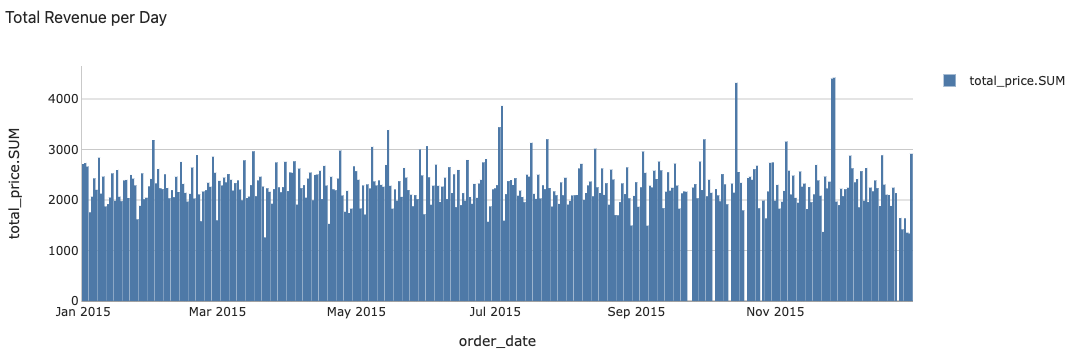

In [16]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
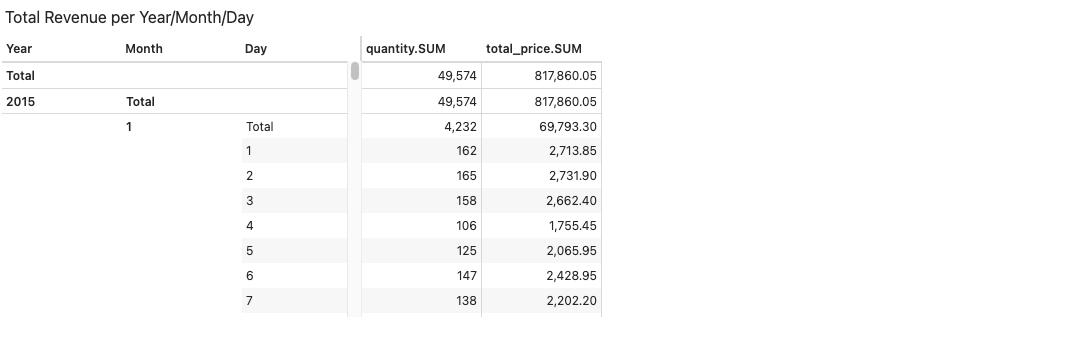

In [17]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
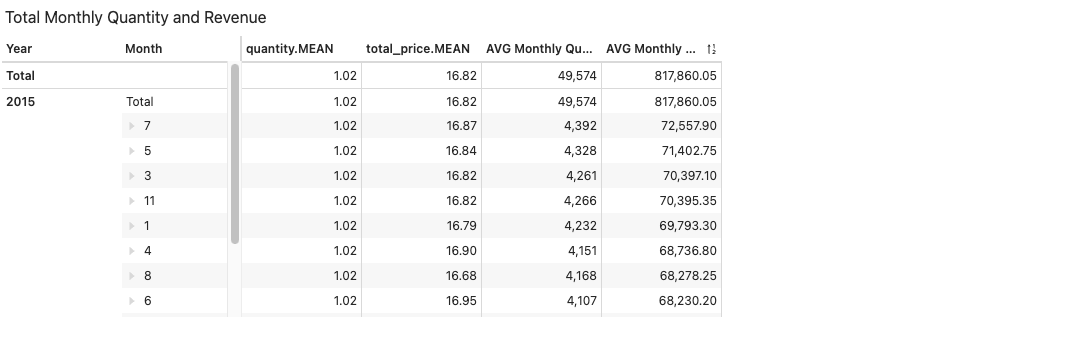

In [18]:
m["AVG Monthly Quantity"] = atoti.agg.sum(
    m["quantity.SUM"], scope=atoti.OriginScope(l["Month"])
)
m["AVG Monthly Revenue"] = atoti.agg.sum(
    m["total_price.SUM"], scope=atoti.OriginScope(l["Month"])
)
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
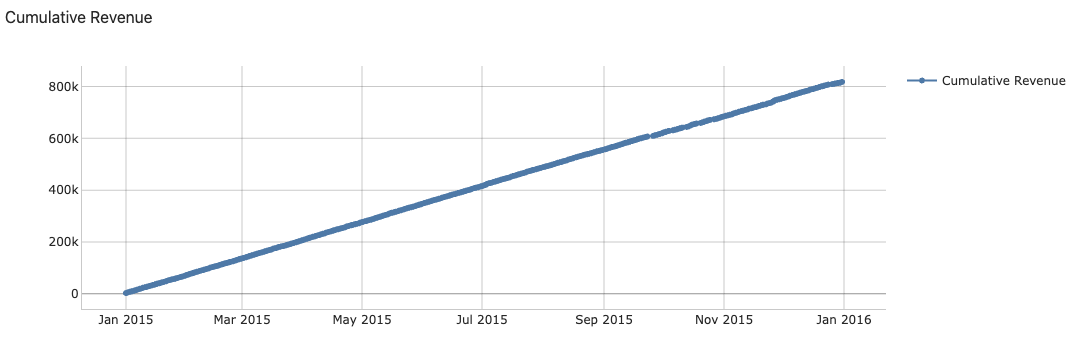

In [19]:
m["Cumulative Revenue"] = atoti.agg.sum(
    m["total_price.SUM"], scope=atoti.CumulativeScope(level=l["order_date"])
)
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
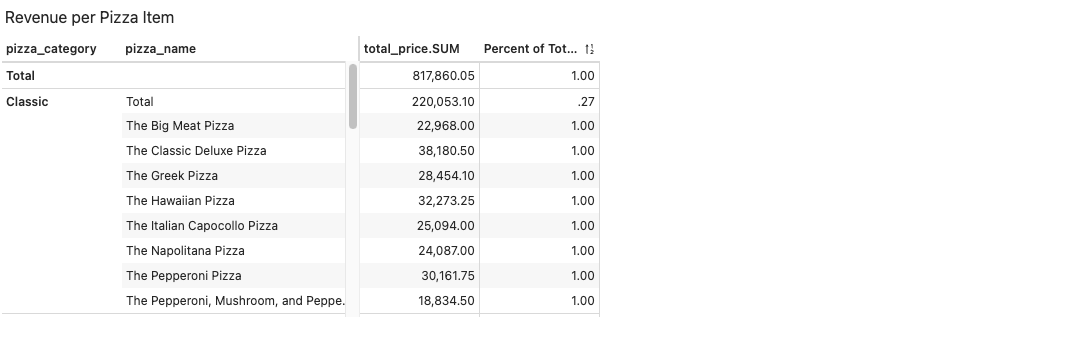

In [20]:
m["Percent of Total Revenue"] = m["total_price.SUM"] / atoti.total(
    m["total_price.SUM"], h["pizza_category"]
)
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
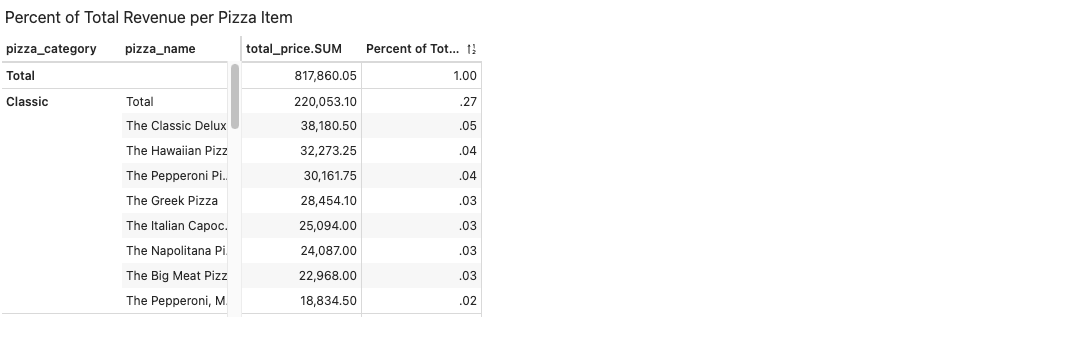

In [21]:
m["Percent of Total Revenue"] = m["total_price.SUM"] / atoti.total(
    m["total_price.SUM"], h["pizza_category"], h["pizza_name"]
)
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
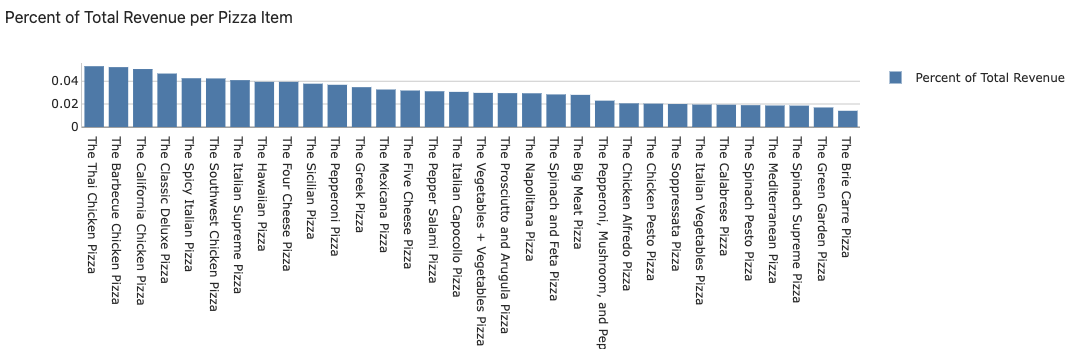

In [22]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
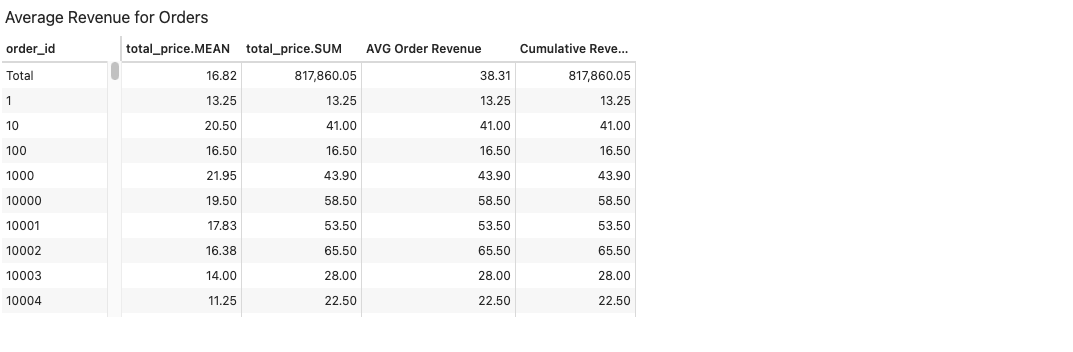

In [23]:
m["AVG Order Revenue"] = atoti.agg.mean(
    m["total_price.SUM"], scope=atoti.OriginScope(l["order_id"])
)
session.widget